# Week 6. Optimization. Programming Task

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [68]:
import numpy as np
import pandas as pd

### Task 1. Reading 

In [69]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [70]:
# !pip install seaborn

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

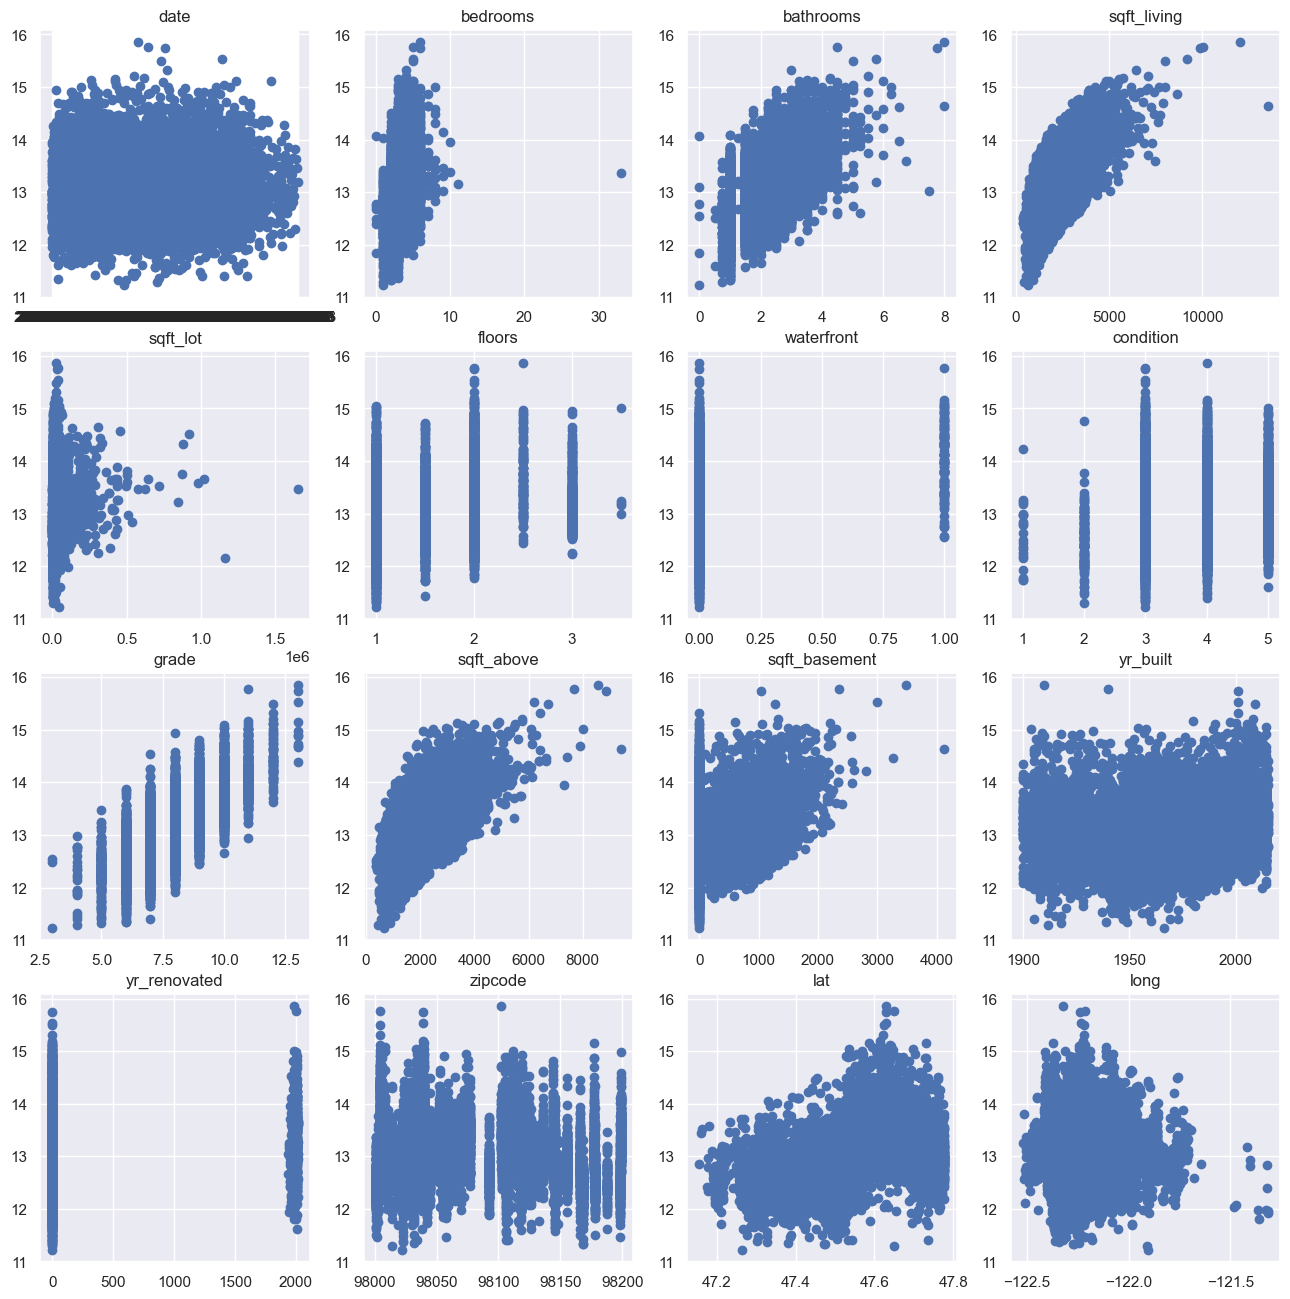

In [72]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
   ax[i//4][i%4].scatter(datX[name], datY)
   ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [73]:
# listing columns
COLS_TO_REMAIN = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']

# matrix $X$, all elements should be real numbers
datX = datX[COLS_TO_REMAIN]

# matrix X
X = datX.values

# number of considered houses
N = datX.shape[0]

# number of features
m = datX.shape[1]

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$  function  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [74]:
def loss(w, X, y):
    """
    Computes the loss function value based on the difference of real vs predicted value
    :param w: weights
    :param X: data
    :param y: features
    :returns: loss function value
    """
    lossValue = (np.sum((X.dot(w) - y) ** 2)) * (1/N)
    return lossValue

### Task 4. Write a function to compute the gradient of the Loss function in the given point  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [75]:
def grad(w_k, X, y):
    """
    Computes the gradient of the loss function
    :param w: weights
    :param X: data
    :param y: features
    :returns: gradient of the loss function at the given point
    """
    lossGradient = 2 * X.T.dot(X.dot(w_k) - y) / N
    return lossGradient


Run the following cells to automatically check your function. 

### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [85]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    """
    Performs gradient descent
    :param w_init: initial weights
    :param alpha: learning rate
    :param X: data
    :param y: labels
    :param maxiter: maximum number of iterations
    :param eps: minimum norm of the gradient
    """
    losses=[]
    weights=[w_init]
    w_k = weights[-1]
    curiter = 0

    #your code goes here
    while True:
        w_k = w_k - alpha * grad(w_k, X, y)
        lossValue_k = loss(w_k, X, y)
        curiter += 1
    
        if curiter > maxiter or np.linalg.norm(grad(w_k, X, y)) < eps:
            break
        
        weights.append(w_k)
        losses.append(lossValue_k)

    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

/var/folders/ng/f8vsqm9539z8fn3nw5gt9whh0000gn/T/ipykernel_63512/1527476437.py:9: RuntimeWarning: overflow encountered in square
  lossValue = (np.sum((X.dot(w) - y) ** 2)) * (1/N)
/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/ng/f8vsqm9539z8fn3nw5gt9whh0000gn/T/ipykernel_63512/1789411699.py:18: RuntimeWarning: invalid value encountered in subtract
  w_k = w_k - alpha * grad(w_k, X, y)


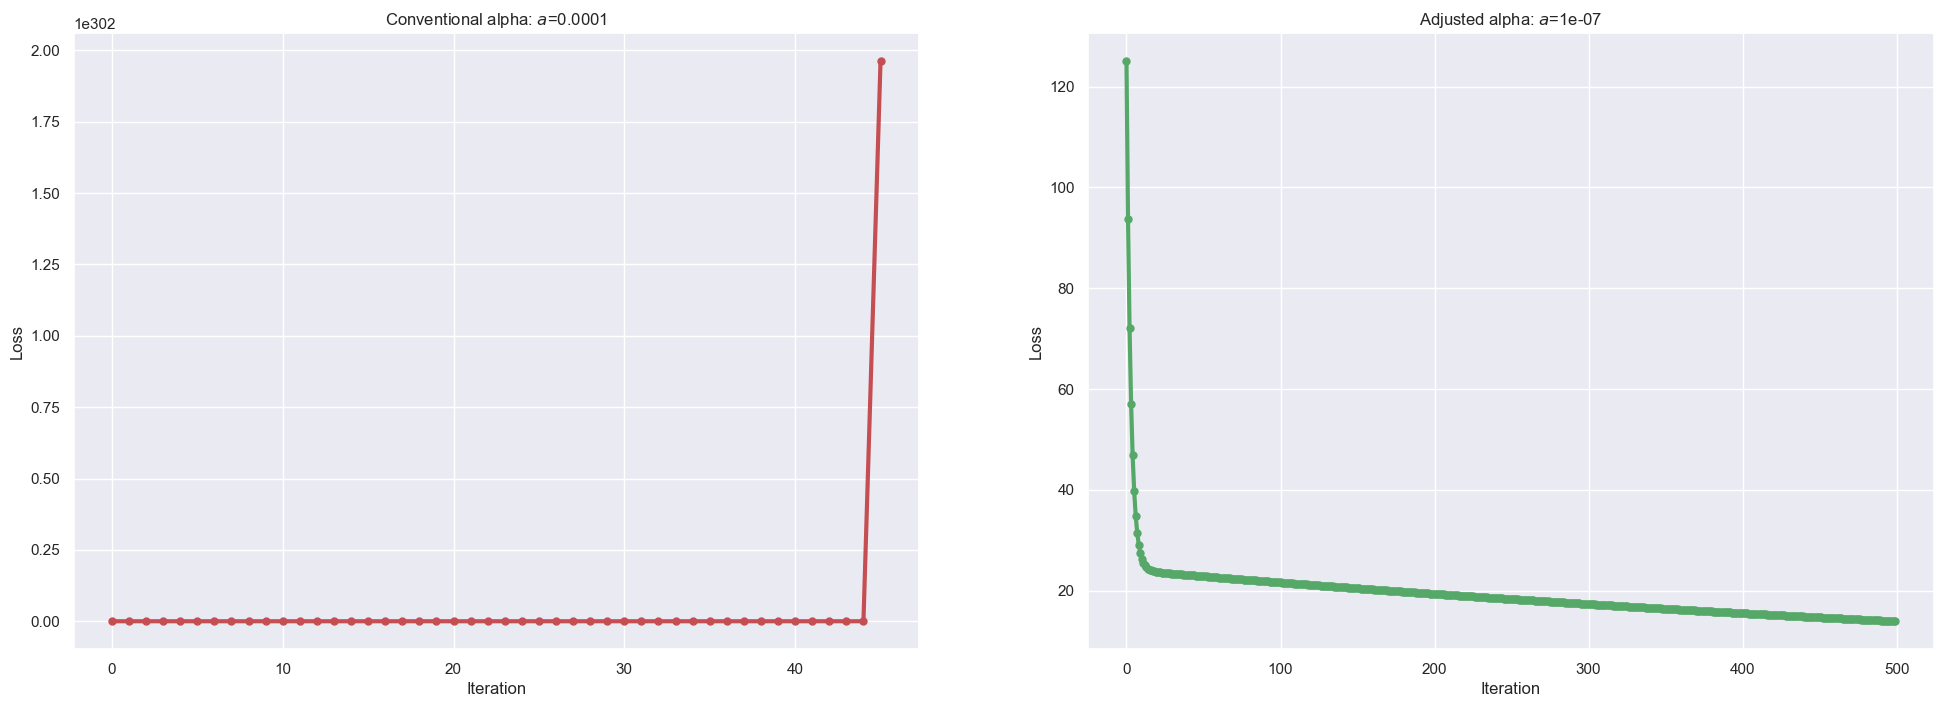

In [77]:
# Initialize the weights
w_init = np.zeros(m)

# generally accepted, conventional alpha. literature suggests 10^-3 to 10^-4
alpha_conventional = 0.0001

# alpha for not normalzied data so that number of iterations actually results in smaller error
alpha_adjusted = 0.0000001

# Perform gradient descent
weights_conv, losses_conv = gradDescent(w_init, alpha_conventional, X, datY, 500, 1e-2)
weights_adj, losses_adj = gradDescent(w_init, alpha_adjusted, X, datY, 500, 1e-2)

# Plot subplots with different alphas
f, ax = plt.subplots(1, 2, figsize=(24, 8))

ax[0].plot(losses_conv, 'ro-', linewidth=3, markersize=5)
ax[0].set_title(f'Conventional alpha: $a$={alpha_conventional}')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')

ax[1].plot(losses_adj, 'go-', linewidth=3, markersize=5)
ax[1].set_title(f'Adjusted alpha: $a$={alpha_adjusted}')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Loss')

plt.show()



Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

Predicted prices:[16.6529903  15.16652979 11.01499638  8.09375401  8.524275   10.73980608
  8.86173432 13.07977785]
Actual prices:[13.80546022 13.12236338 13.32937755 12.5979458  13.03134398 12.92391244
 12.37834387 13.42984808]

MAPE: 21.5%
MAE: 2.78


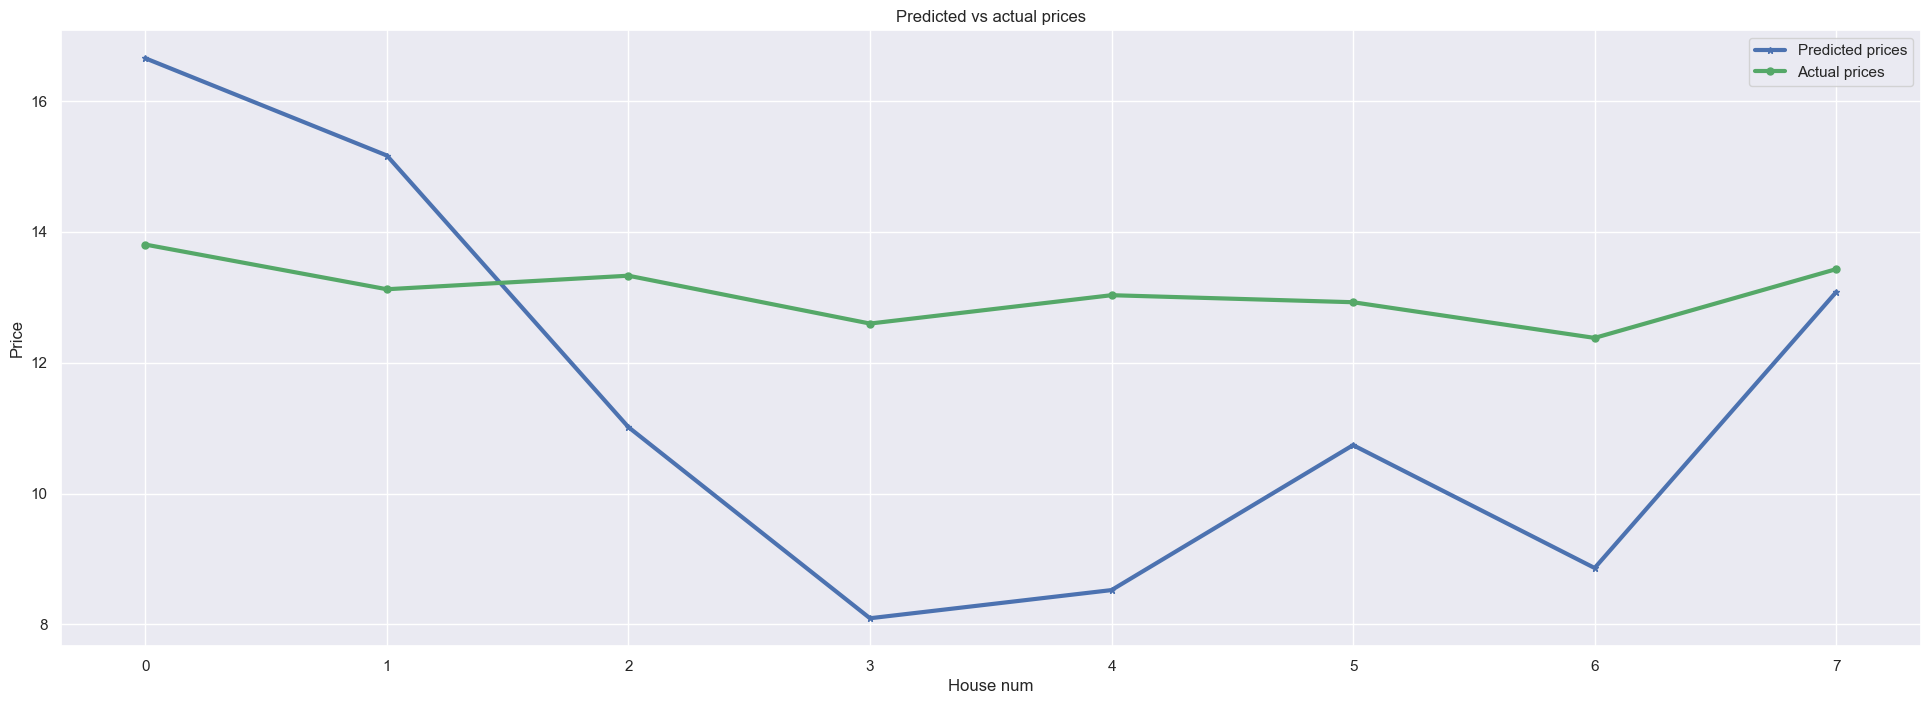

In [78]:
# choosing houses from the df
houses = [7, 99, 108, 314, 895, 7007, 9999, 11222]

# predicted prices
predicted_prices = X[houses].dot(weights_adj[-1])

# actual prices
actual_prices = datY[houses]

# check values of predicted prices vs actual prices
print(f'Predicted prices:{predicted_prices}\nActual prices:{actual_prices}\n')

# check mean absolute error and mean absolute percentage error for interpretability
mape = np.sum(np.abs((predicted_prices - actual_prices) / actual_prices)) / len(houses)
mae = np.sum(np.abs(predicted_prices - actual_prices)) / len(houses)
print(f'MAPE: {mape:.1%}\nMAE: {round(mae,2)}')


# Plot the results
f, ax = plt.subplots(1, 1, figsize=(24, 8))

ax.plot(predicted_prices, 'b*-', linewidth=3, markersize=5, label='Predicted prices')
ax.plot(actual_prices, 'go-', linewidth=3, markersize=5, label='Actual prices')

ax.set_title('Predicted vs actual prices')
ax.set_xlabel('House num')
ax.set_ylabel('Price')

ax.legend()
plt.show()

`Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (1 point)`

- **Considering that we still work with raw data, which is not normalized, and by simply comparing the graphs with our eyes, we can say that the results are relatively _OK_.** 
- **However, we've plotted only a limited number of houses, and we do not know the value of percent difference represented by `MAPE` or absolute difference represented by `MAE`.**
- **For that reason, I've calculated both MAE and MAPE to derive a conclusion in a more objective way.**
- **As we can see, the `percentage difference revolves around 20-25%`, which is relatively high. `Absolute value differences are around 3`, which is also relatively high.**
- **It is important to note that we neither use a train-test split nor shuffle our training data, so the results will be inconclusive anyway.**
- **Overall, the results are neither good or bad, but still can be improved, as I show below.**


### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [79]:
def norm(X):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$ s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

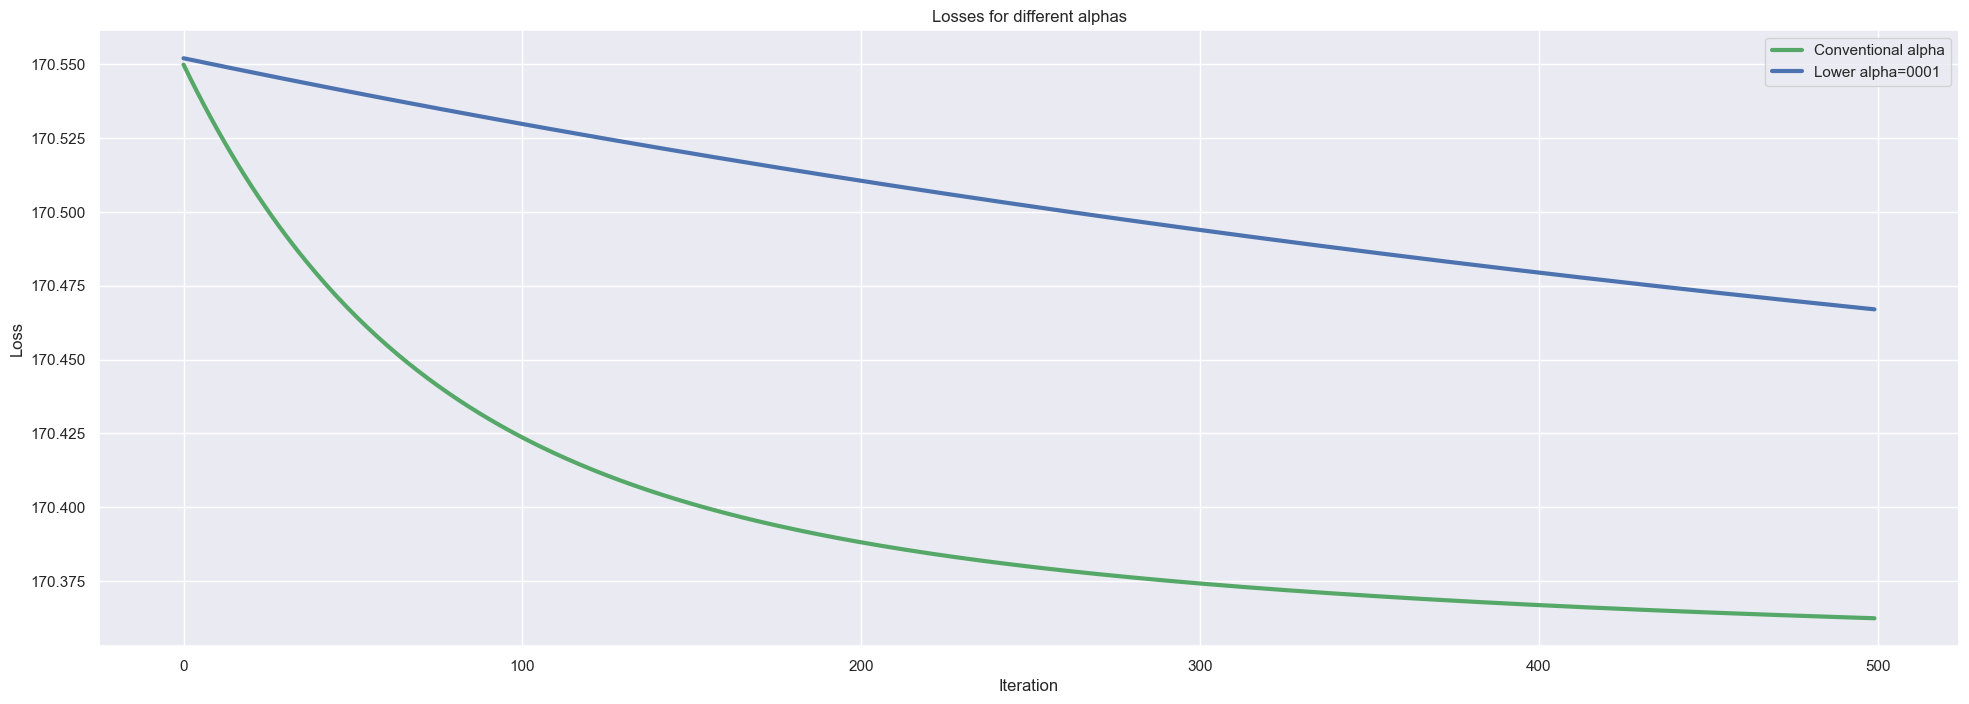

In [80]:
# Normalized data frame
normalized_X = norm(X)

# Initialize the weights
w_init = np.zeros(m)

# Perform gradient descent
weights_normalized, loss_normalized = gradDescent(w_init, 0.001, normalized_X, datY, 500, 1e-2)
weights_normalized_lower_alpha, loss_normalized_lower_alpha = gradDescent(w_init, 0.0001, normalized_X, datY, 500, 1e-2)

# plotting
f, ax = plt.subplots(1, 1, figsize=(24, 8))

ax.plot(loss_normalized, 'g-', linewidth=3, markersize=5, label='Conventional alpha')
ax.plot(loss_normalized_lower_alpha, 'b-', linewidth=3, markersize=5, label='Lower alpha=0001')

ax.set_title('Losses for different alphas')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
ax.legend()
plt.show()


### Task 8. Better pay twice  (1 point)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [81]:
def new_loss(w, X, y, a, b):
    """
    Updated version of the loss function
    :param w: weights
    :param X: data
    :param y: labels
    :param a: asymetricity when y is bigger than y hat
    :param b: asymetricity when y is less or equal to y hat
    :returns: loss function value
    """
    pred = np.dot(X, w)
    lossValue = np.sum(np.where(X.dot(w) < y, a * (1/N) * (np.square(y - X.dot(w))), b * (1/N) * (np.square(y - X.dot(w))))) / N
    return lossValue

def new_grad(w_k, X, y, a, b):
    """
    Updated version of the gradient loss function
    :param w_k: weights
    :param X: data
    :param y: features
    :param a: asymetricity when y is bigger than y hat
    :param b: asymetricity when y is less or equal to y hat
    :returns: gradient of the loss function at a given point
    """   
    # conditions for a
    xa = X[X.dot(w_k) < y]
    xb = X[X.dot(w_k) >= y]
    
    # conditions for b
    ya = y[X.dot(w_k) < datY]
    yb = y[X.dot(w_k) >= datY]

    # matrix multiplication 
    lossGradient_a = -2 * (a) * xa.T @ (ya - xa.dot(w_k))
    lossGradient_b = -2 * (b) * xb.T @ (yb - xb.dot(w_k))
    
    # calc gradient loss
    lossGradient = (lossGradient_a + lossGradient_b) / N
    return lossGradient

In [82]:
# updating gradDescent funct
def gradDescent_upgraded(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    """
    Updated version of the graident descent function
    :param w_init: initial weights
    :param alpha: learning rate
    :param X: data
    :param y: labels
    :param maxiter: maximum number of iterations
    :param eps: minimum norm of the gradient
    """
    losses=[]
    weights=[w_init]
    w_k = weights[-1]
    curiter = 0

    # normalizing data
    X = norm(X)

    while True:
        w_k = w_k - alpha * new_grad(w_k, X, y, a, b)
        lossValue_k = new_loss(w_k, X, y, a, b)
        curiter += 1

        if curiter > maxiter or np.linalg.norm(new_grad(w_k, X, y, a, b)) < eps:
            break
        
        weights.append(w_k)
        losses.append(lossValue_k)

    return weights, losses

### Task 9. More experiments! (2 points)

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

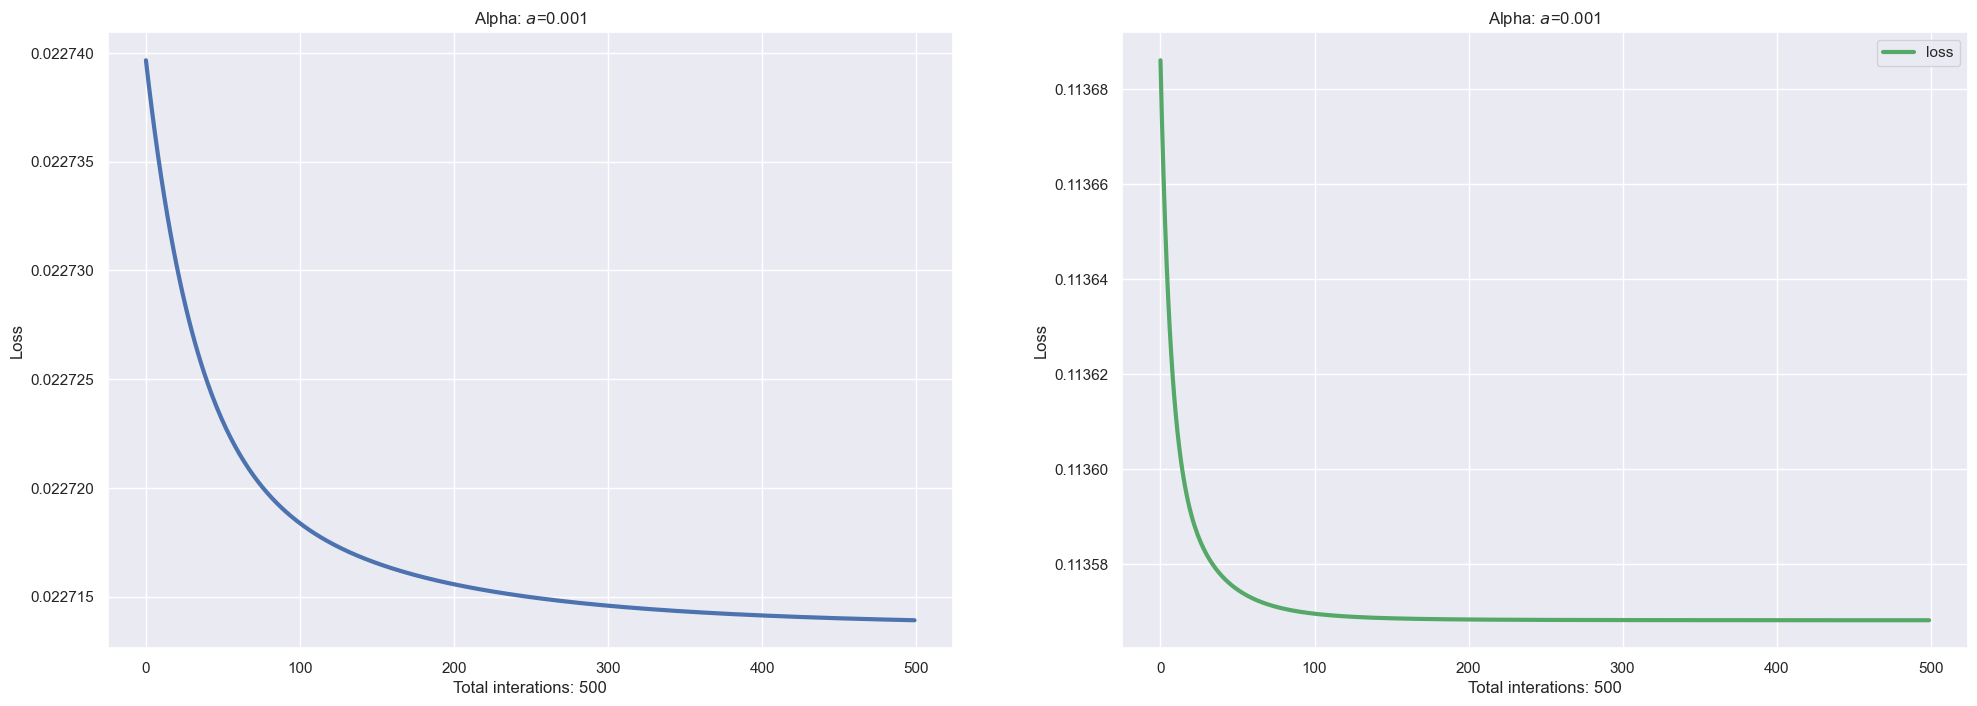

In [83]:
# params
a1, b1 = 2, 10
a2, b2 = 10, 2
w_init = np.zeros(m)
alpha = 0.001
max_iter = 500
beta = 1e-2

# loss using updated gradient descent
weights_a1b1, losses_a1b1 = gradDescent_upgraded(w_init, alpha, normalized_X, datY, a1, b1, max_iter, beta)
weights_a2b2, losses_a2b2 = gradDescent_upgraded(w_init, alpha, normalized_X, datY, a2, b2, max_iter, beta)

# plotting results
f, ax = plt.subplots(1, 2, figsize=(24, 8))

ax[0].plot(losses_a1b1, 'b-', linewidth=3, markersize=5, label='loss')
ax[0].set_title(f'Alpha: $a$={alpha}')
ax[0].set_xlabel(f'Total interations: {max_iter}')
ax[0].set_ylabel('Loss')

ax[1].plot(losses_a2b2, 'g-', linewidth=3, markersize=5, label='loss')
ax[1].set_title(f'Alpha: $a$={alpha}')
ax[1].set_xlabel(f'Total interations: {max_iter}')
ax[1].set_ylabel('Loss')

plt.legend()
plt.show()


Weights for a1, b1: [-0.00271173  0.04317969  0.10680181  0.01906775  0.05417039  0.15120424
  0.08629525  0.06036673 -0.02492353  0.17717534]
Weights for a2, b2: [-0.01876834  0.01387     0.10993998  0.00985709  0.06700496  0.19337936
  0.09141709  0.05727514 -0.02558798  0.19743831]


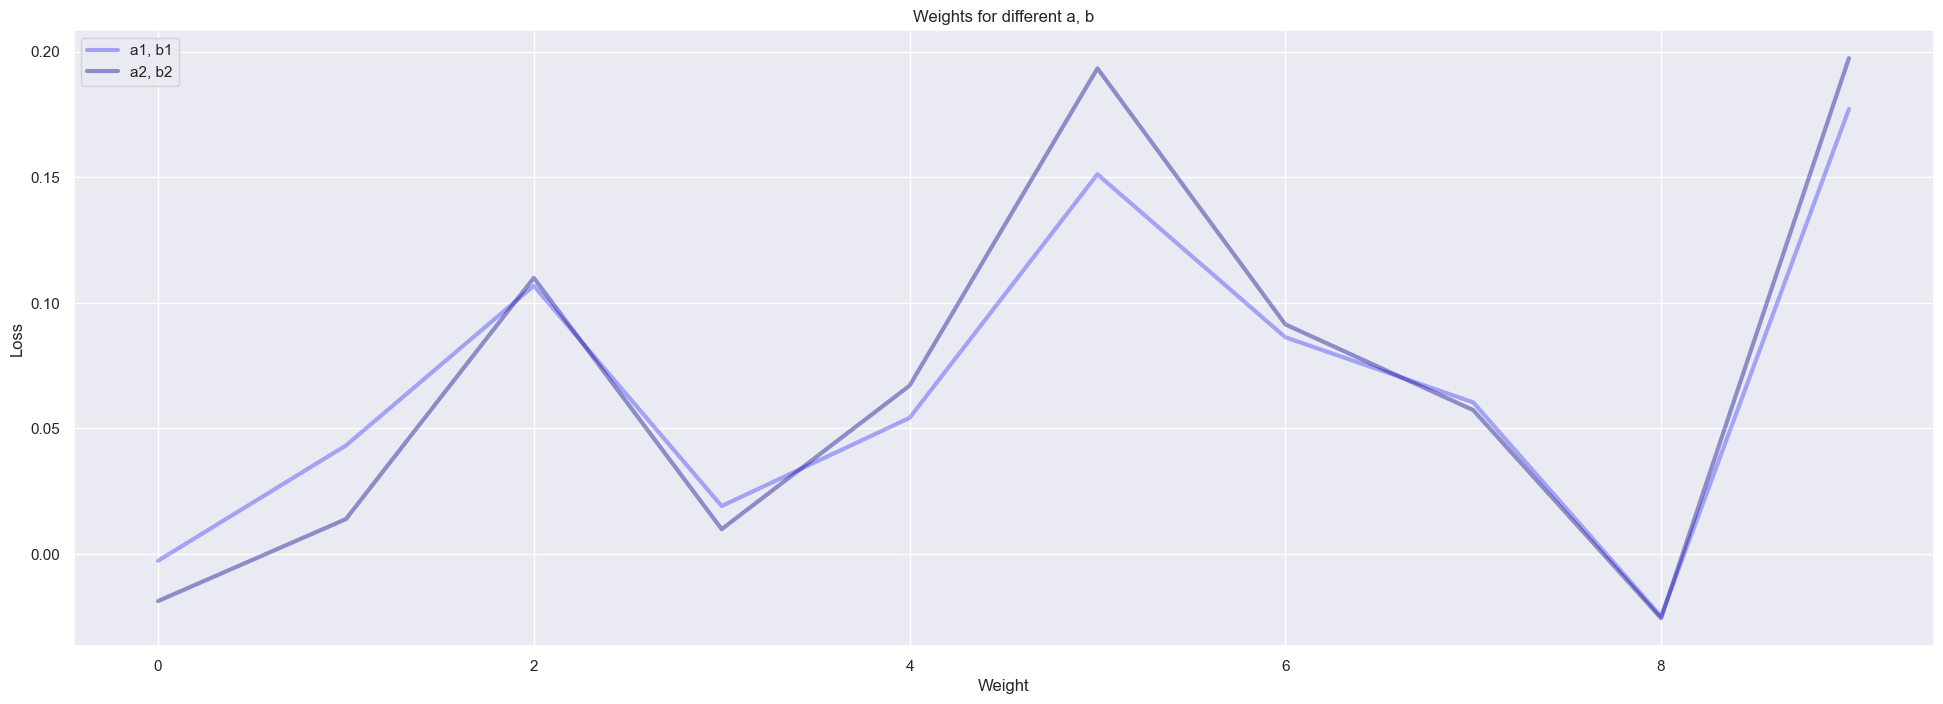

In [84]:
# Checking weights
print(f'Weights for a1, b1: {weights_a1b1[-1]}')
print(f'Weights for a2, b2: {weights_a2b2[-1]}')


# plotting weiths
f, ax = plt.subplots(1, 1, figsize=(24, 8))

ax.plot(weights_a1b1[-1], color='blue', linewidth=3, markersize=5, label='a1, b1', alpha=.3)
ax.plot(weights_a2b2[-1], color='darkblue', linewidth=3, markersize=5, label='a2, b2', alpha=.4)

ax.set_title('Weights for different a, b')
ax.set_xlabel('Weight')
ax.set_ylabel('Loss')
ax.legend()
plt.show()


### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?  
**As it can be inferred from the results of the loss and weights graphs above, using different $\alpha$ values or $(a,b)$ value-pairs produces relatively the same optimal weights**  
**$\therefore$ one can claim that the upgraded gradient descent function works properly and allows us to find the function's minimum.**  


2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).
- **One can choose $b$ by comparing the MAE and MAPE values of the model with and without assymetry.**
- **Likewise, one can simulate the run several times and check for convergence, allowing to approximate the value of $b$ that produces the highest rate of convergence to $0$.**